In [1]:
from fastai.vision import *

In [2]:
# 1: Do a google image search of what you want to scrape images of

# 2: Paste the code below in your browser's console and run it to generate a file containing all the URL's of the images you've searced for
#    urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
#    window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [11]:
#Create folder and file names

folder1 = 'deathstroke'
file1 = 'deathstroke.csv'

folder2 = 'deadpool'
file2 = 'deadpool.csv'

In [12]:
#Make the directories

path = Path('data/heros')
dest1 = path/folder1
dest1.mkdir(parents=True, exist_ok=True)

dest2 = path/folder2
dest2.mkdir(parents=True, exist_ok=True)

In [13]:
#Make sure that the path leads to a directory structure as shown below

path.ls()

[WindowsPath('data/heros/deadpool'),
 WindowsPath('data/heros/deadpool.csv'),
 WindowsPath('data/heros/deathstroke'),
 WindowsPath('data/heros/deathstroke.csv')]

In [14]:
#Define classes

classes = ['deathstroke','deadpool']

In [16]:
#Download the images to the folders

download_images(path/'deathstroke.csv', dest1, max_pics=200)

download_images(path/'deadpool.csv', dest2, max_pics=200)

In [17]:
#Verify if the images can be opened

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

deathstroke


deadpool


In [18]:
#The code below is meant to display some of the data that was downloaded

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['deadpool', 'deathstroke']

C:\Users\AliHaider\Anaconda3\envs\DSC\lib\site-packages\torch\nn\functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


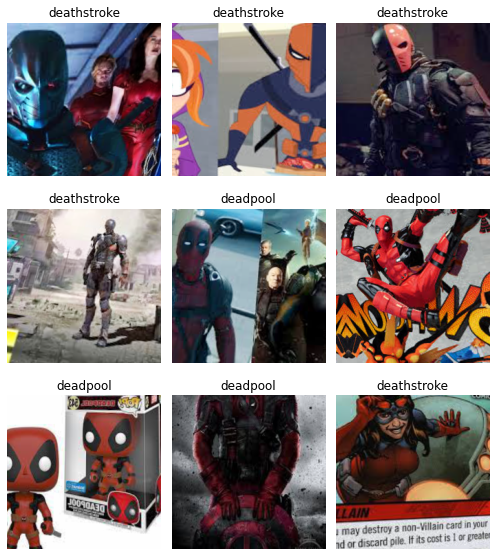

In [20]:
data.show_batch(rows=3, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['deadpool', 'deathstroke'], 2, 320, 80)